In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from matplotlib.pyplot import figure

In [20]:
centers = [[11,7.5],[17,12.5]]
X, _ = make_blobs(n_samples = 300, centers = centers, cluster_std = 2)

In [21]:
##Getting co-ordinates of one car
from firebase import firebase
firebase = firebase.FirebaseApplication('https://ambu-b65bb.firebaseio.com/', None)
carx = firebase.get('/car/231427/location/lat', None)
cary = firebase.get('/car/231427/location/lon', None)
carid = firebase.get('/car', None)
cid = list(carid)
print(cid[0])
print(carx)
print(cary)
X = np.append(X,[np.array([carx,cary])],axis=0)

231427
18
7.5


In [22]:
## Getting the co-ordinates of ERV
from firebase import firebase
firebase = firebase.FirebaseApplication('https://ambu-b65bb.firebaseio.com/', None)
erv_dest_x = firebase.get('/Ambulance/154068/destination/lat', None)
erv_dest_y = firebase.get('/Ambulance/154068/destination/lon', None)
print(erv_dest_x)
print(erv_dest_y)

14
12.5


[18.   7.5]


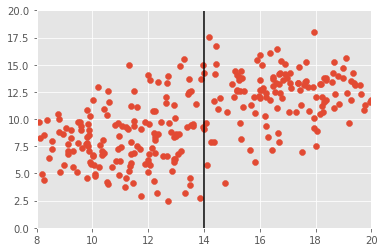

In [23]:
plt.scatter(X[:,0],X[:p,1])
print(X[300])
plt.plot([14,14],[0,20],color="black")
plt.ylim(0,20)
plt.xlim(8,20)
plt.show()

In [24]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [25]:
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[[10.96505687  7.76299396]
 [17.0511248  12.84454948]]
Number of estimated clusters: 2


In [26]:
colors = 10*['g.','b.','c.','k.','y.','m.']

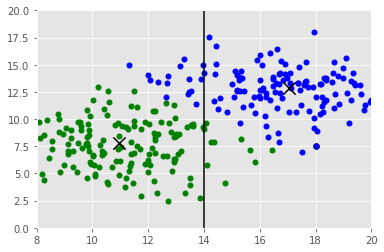

In [27]:
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)
plt.plot([14,14],[0,20],color="black")
plt.scatter(carx,cary,color="black")
plt.ylim(0,20)
plt.xlim(8,20)
plt.show()

In [28]:
# count1=0 count2=0 count3=0
count = []
for i in range(n_clusters_):
    count.append(0)
print(count[0]) 

0


In [29]:
# counting the no.of cars in each cluster
for i in range(n_clusters_):
    for j in range(len(X)):
        if(labels[j]==i):
            count[i]=count[i]+1
            
for i in range(n_clusters_):
    print(count[i])

155
146


In [30]:
highlabel=0;
temp=count[0]
for i in range(n_clusters_):
    if count[i]>temp:
        temp = count[i]
        highlabel=i
print(highlabel)

0


In [31]:
## moving all min(n-1) co-ordinates to max clustered lane

for i in range(len(X)):
    if(labels[i]!=highlabel):
        print("Co-ordinates are :",X[i])

Co-ordinates are : [19.75885485 11.28583873]
Co-ordinates are : [17.73706576 12.96771518]
Co-ordinates are : [16.54742636 12.48065853]
Co-ordinates are : [14.59224256 11.93561725]
Co-ordinates are : [18.28885504 13.78487141]
Co-ordinates are : [18.69585674 12.30199416]
Co-ordinates are : [17.29203613 10.68441633]
Co-ordinates are : [18.04568241  8.92374854]
Co-ordinates are : [13.12433733 14.91514561]
Co-ordinates are : [17.6733635  15.25749929]
Co-ordinates are : [18.38798777 11.70991813]
Co-ordinates are : [17.60382365 13.38945528]
Co-ordinates are : [14.37366178 11.67377627]
Co-ordinates are : [19.20754195  9.67432853]
Co-ordinates are : [15.28419343 12.59037395]
Co-ordinates are : [17.94461856 18.03789347]
Co-ordinates are : [13.95239049 14.95211974]
Co-ordinates are : [15.41084037 11.12718773]
Co-ordinates are : [16.62532816 11.01790437]
Co-ordinates are : [13.41535229 12.28761969]
Co-ordinates are : [20.32794717 20.82053888]
Co-ordinates are : [15.77704244 12.04600127]
Co-ordinat

In [32]:
for i in range(len(X)):
    if highlabel<labels[i]:
        print("Move left")
    elif highlabel>labels[i]:
        print("Move Right")

Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left


In [33]:
TP=0
TN=0
FP=0
FN=0
for i in range(len(X)):
    if(labels[i]==0):
        if(X[i][0]<14):
            TP=TP+1
    if(labels[i]==1):
        if(X[i][0]>14):
            TN=TN+1
    if(labels[i]==0):
        if(X[i][0]>14):
            FP=FP+1
    if(labels[i]==1):
        if(X[i][0]<14):
            FN=FN+1
print((TP+TN)/(FP+FN+TP+TN))

0.9136212624584718
